In [1]:
import pandas as pd
# go up a level to import mc_processor
import sys
sys.path.append('..')
import mc_processor
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import visualizing

import importlib
importlib.reload(mc_processor)
importlib.reload(visualizing)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
survey_year = str(2023)

In [19]:
# read results files

codebook = pd.read_csv('raw/levels_codebook.csv', encoding='utf-8')
data = pd.read_csv('raw/data.csv', encoding='utf-8')
q_codebook = pd.read_csv('raw/question_codebook.csv', encoding='utf-8', index_col = 'qid')

# q_codebook into dict
q_codebook = q_codebook.to_dict().get('qidFull')
# q_codebook = q_codebook["qidFull"]

In [4]:
questions = [f"BPC{i}" for i in range(17,21)]

df = mc_processor.get_parallel_questions(data, codebook, q_codebook, questions, survey_year, demo=None)
df.to_csv("confidence.csv")
display(df.map(lambda x: f"{x:.1%}"))

,"How confident are you, if at all, that your vote will be counted accurately in the 2024 presidential election?","How confident are you, if at all, that votes in your local community will be counted accurately in the 2024 presidential election?","How confident are you, if at all, that votes in your state will be counted accurately in the 2024 presidential election?","How confident are you, if at all, that votes across the country will be counted accurately in the 2024 presidential election?"
Very confident,43.1%,45.4%,42.6%,33.5%
Somewhat confident,26.2%,28.5%,30.3%,30.4%
Not too confident,12.8%,11.2%,11.6%,16.3%
Not at all confident,9.4%,6.7%,7.7%,12.1%
Don't know/no opinion,8.6%,8.1%,7.8%,7.6%


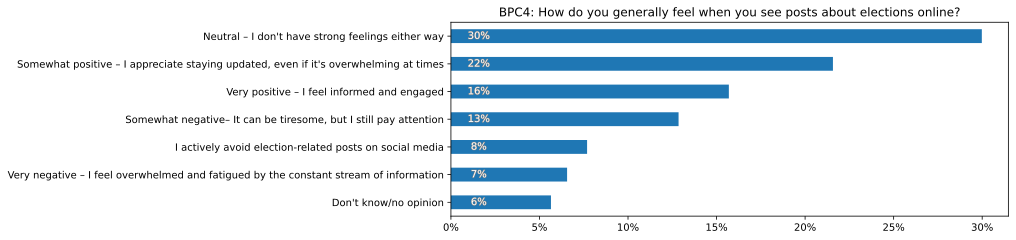

In [25]:
df = mc_processor.run_and_display(data,codebook,q_codebook,"BPC4",survey_year,demo,suppress_output=False)
df.to_csv("feelings.csv")

In [21]:
# 1, 3, 5
demo = None

questions = [f"BPC{i}" for i in range(1,6,2)]

df = mc_processor.get_parallel_questions(data, codebook, q_codebook, questions, survey_year, demo=None)
display(df.map(lambda x: f"{x:.1%}"))
ax = visualizing.plot_question(df, 'BPC 1, 3, 5', 'Where would you look for ___ info?')

for question in questions:
     df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo,suppress_output=False)
     print(question,mc_processor.get_question_text(q_codebook,question))
     display(df.map(lambda x: f"{x:.1%}"))

# df.to_csv('csvs/source_questions.csv', index=True)

ValueError: Length mismatch: Expected axis has 5 elements, new values have 1 elements

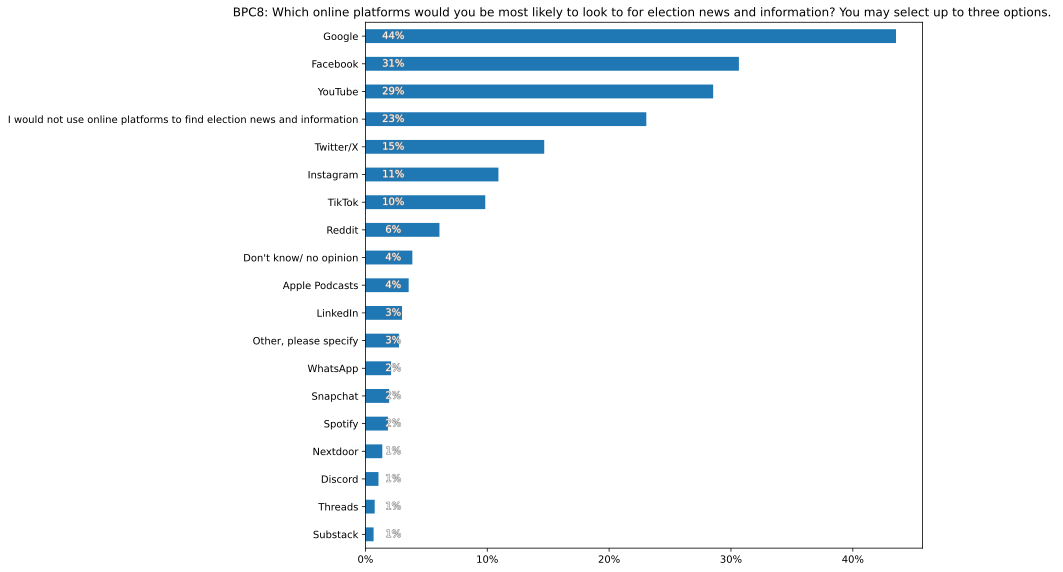

BPC8 Which online platforms would you be most likely to look to for election news and information? You may select up to three options. 


,overall
Apple Podcasts,3.6%
Discord,1.1%
Don't know/ no opinion,3.9%
Facebook,30.7%
Google,43.5%
I would not use online platforms to find election news and information,23.1%
Instagram,10.9%
LinkedIn,3.0%
Nextdoor,1.4%
"Other, please specify",2.8%


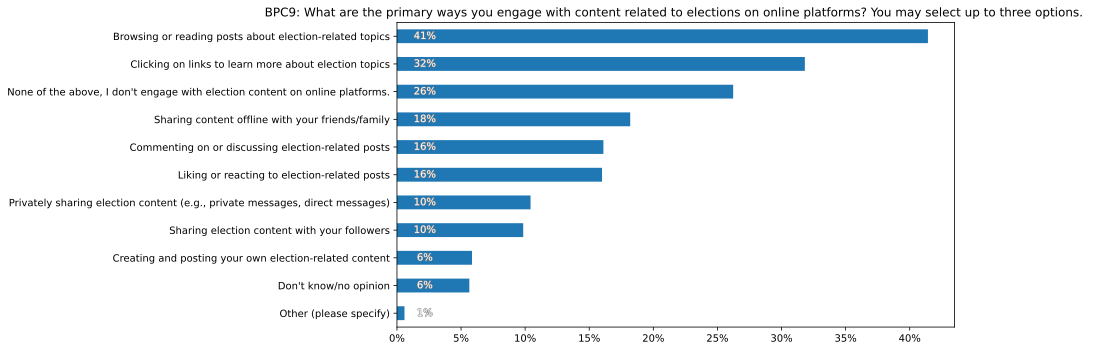

BPC9 What are the primary ways you engage with content related to elections on online platforms? You may select up to three options. 


,overall
Browsing or reading posts about election-related topics,41.4%
Clicking on links to learn more about election topics,31.8%
Commenting on or discussing election-related posts,16.1%
Creating and posting your own election-related content,5.9%
Don't know/no opinion,5.6%
Liking or reacting to election-related posts,16.0%
"None of the above, I don't engage with election content on online platforms.",26.2%
Other (please specify),0.6%
"Privately sharing election content (e.g., private messages, direct messages)",10.4%
Sharing content offline with your friends/family,18.2%


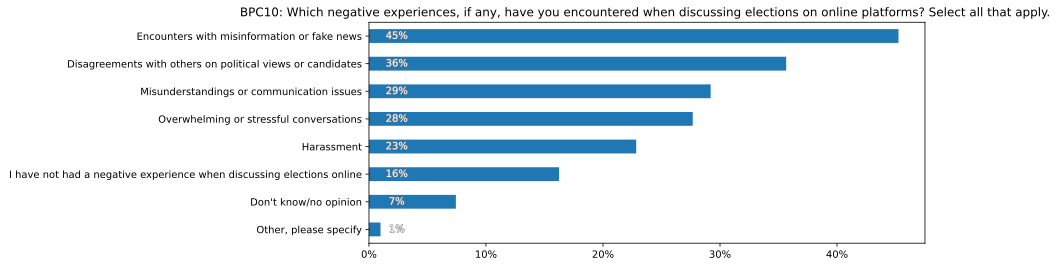

BPC10 Which negative experiences, if any, have you encountered when discussing elections on online platforms? Select all that apply. 


,overall
Disagreements with others on political views or candidates,35.7%
Don't know/no opinion,7.4%
Encounters with misinformation or fake news,45.3%
Harassment,22.8%
I have not had a negative experience when discussing elections online,16.2%
Misunderstandings or communication issues,29.2%
"Other, please specify",1.0%
Overwhelming or stressful conversations,27.7%


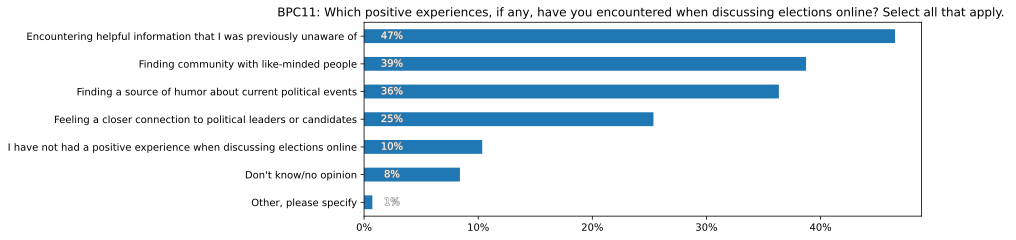

BPC11 Which positive experiences, if any, have you encountered when discussing elections online? Select all that apply. 


,overall
Don't know/no opinion,8.4%
Encountering helpful information that I was previously unaware of,46.5%
Feeling a closer connection to political leaders or candidates,25.4%
Finding a source of humor about current political events,36.3%
Finding community with like-minded people,38.7%
I have not had a positive experience when discussing elections online,10.4%
"Other, please specify",0.7%


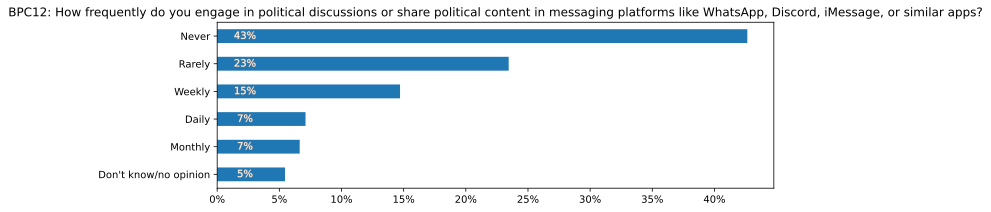

BPC12 How frequently do you engage in political discussions or share political content in messaging platforms like WhatsApp, Discord, iMessage, or similar apps?


,overall
Daily,7.1%
Weekly,14.7%
Monthly,6.6%
Rarely,23.4%
Never,42.6%
Don't know/no opinion,5.5%


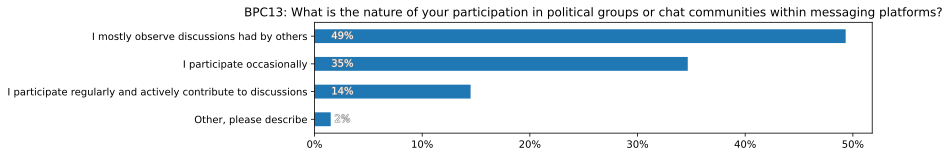

BPC13 What is the nature of your participation in political groups or chat communities within messaging platforms?


,overall
I participate regularly and actively contribute to discussions,14.5%
I participate occasionally,34.7%
I mostly observe discussions had by others,49.3%
"Other, please describe",1.5%


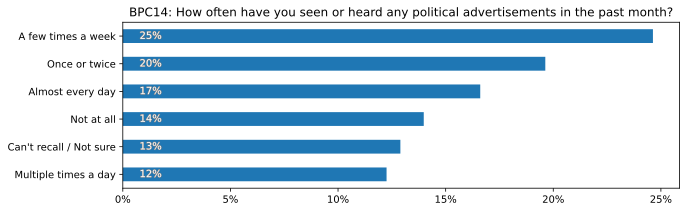

BPC14 How often have you seen or heard any political advertisements in the past month?


,overall
Not at all,14.0%
Once or twice,19.6%
A few times a week,24.6%
Almost every day,16.6%
Multiple times a day,12.3%
Can't recall / Not sure,12.9%


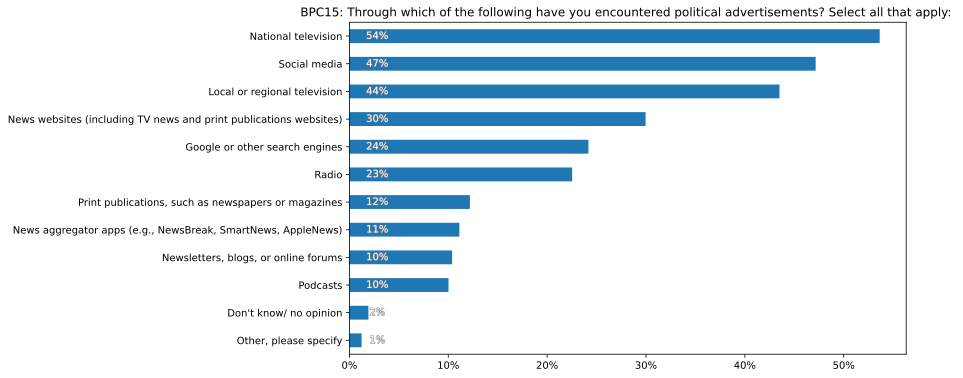

BPC15 Through which of the following have you encountered political advertisements? Select all that apply: 


,overall
Don't know/ no opinion,1.9%
Google or other search engines,24.2%
Local or regional television,43.5%
National television,53.6%
"News aggregator apps (e.g., NewsBreak, SmartNews, AppleNews)",11.1%
News websites (including TV news and print publications websites),30.0%
"Newsletters, blogs, or online forums",10.4%
"Other, please specify",1.2%
Podcasts,10.0%
"Print publications, such as newspapers or magazines",12.2%


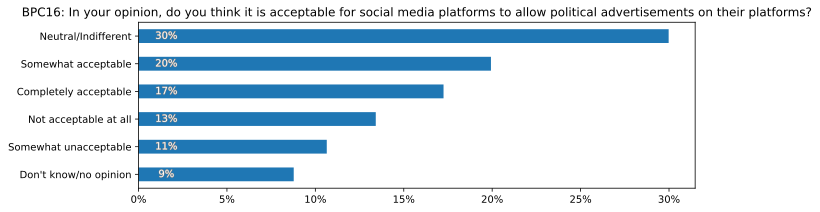

BPC16 In your opinion, do you think it is acceptable for social media platforms to allow political advertisements on their platforms?


,overall
Not acceptable at all,13.4%
Somewhat unacceptable,10.6%
Neutral/Indifferent,30.0%
Somewhat acceptable,19.9%
Completely acceptable,17.2%
Don't know/no opinion,8.8%


In [23]:
questions = [f"BPC{i}" for i in range(8,17)]

for question in questions:
     df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo,suppress_output=False)
     print(question,mc_processor.get_question_text(q_codebook,question))
     display(df.map(lambda x: f"{x:.1%}"))
